# **Overview**

In this project, I will demonstrate my understanding of several concepts from time series theory and train an ARIMA model using the provided data set.

In [ ]:
#  import packages which are needed

!pip install statsmodels==0.13.2

import pandas as pd
from pandas import datetime

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

# Set the default figure style
plt.style.use('./d4sci.mplstyle')

%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Part A - Data Cleaning**



In Part A, I perfomed data imputation on a provided DataFrame by using a mean (average).

Then I performed data imputation on a provided DataFrame by replacing each "NaN" value with the value of its previous element.

The weather data is from: https://www.theweathernetwork.com/ca/monthly/saskatchewan/regina

Load the **toy_df** DataFrame

In [ ]:
rng = pd.date_range('2022-05-01', periods=31, freq='D')

toy_df = pd.DataFrame({ 'Date': rng, 
                       'Temperature': [15.7, 16.6, 18.4, 23.3, 27.6, 24.8, 20.0,
                                       19.9, 16.1, 13.5, "NaN", 19.3, 9.5, 16.1, 
                                       19.3, 22.8, 25.1, 13.0, 13.2, "NaN", 12.0, 
                                       17.5, 20.6, 23.0, 24.5, 24.1, 23.5, 23.5, 
                                       17.4, 15.9, 16.0]})

**1.** Output the contents of the **toy_df** DataFrame here

In [ ]:
# Output the contents of the toy_df DataFrame
print(toy_df)

         Date Temperature
0  2022-05-01        15.7
1  2022-05-02        16.6
2  2022-05-03        18.4
3  2022-05-04        23.3
4  2022-05-05        27.6
5  2022-05-06        24.8
6  2022-05-07        20.0
7  2022-05-08        19.9
8  2022-05-09        16.1
9  2022-05-10        13.5
10 2022-05-11         NaN
11 2022-05-12        19.3
12 2022-05-13         9.5
13 2022-05-14        16.1
14 2022-05-15        19.3
15 2022-05-16        22.8
16 2022-05-17        25.1
17 2022-05-18        13.0
18 2022-05-19        13.2
19 2022-05-20         NaN
20 2022-05-21        12.0
21 2022-05-22        17.5
22 2022-05-23        20.6
23 2022-05-24        23.0
24 2022-05-25        24.5
25 2022-05-26        24.1
26 2022-05-27        23.5
27 2022-05-28        23.5
28 2022-05-29        17.4
29 2022-05-30        15.9
30 2022-05-31        16.0


In [ ]:
 # We can output in two ways, the other way is shown below
 toy_df

,Date,Temperature
0,2022-05-01,15.7
1,2022-05-02,16.6
2,2022-05-03,18.4
3,2022-05-04,23.3
4,2022-05-05,27.6
5,2022-05-06,24.8
6,2022-05-07,20.0
7,2022-05-08,19.9
8,2022-05-09,16.1
9,2022-05-10,13.5


**2.** Next, I have **only** output the rows of the **toy_df** DataFrame that contain a "NaN" value in the "Temperature" column.

In [ ]:
# output the rows of the toy_df DataFrame that contain a "NaN" value in the "Temperature" column
print(toy_df[toy_df.Temperature == "NaN"])

         Date Temperature
10 2022-05-11         NaN
19 2022-05-20         NaN


As you can see only rows with "NaN" values in Temperature column are shown above

**3.** Now I created a DataFrame that has the same data as the **toy_df** DataFrame except any rows that contain a "NaN" value in the "Temperature" column. There are several ways that I can do this. For example, I can first create a copy of the **toy_df** DataFrame and then modify the copied DataFrame to remove rows with a "NaN" value.

In [ ]:
# Creating a DataFrame that has the same data as the toy_df DataFrame except any rows that contain a "NaN" value in the "Temperature"
# 1st Step: Create a copy of toy_df
copy_toy_df = toy_df

# 2nd Step: Removing the "NaN" values from copied DataFrame 
copy_toy_df = copy_toy_df[copy_toy_df.Temperature != "NaN"]

I can print out this DataFrame again. The row with the "NaN" value is now gone (there is no row for 2022-05-03 and 2022-05-20).

**4.** Output the contents of DataFrame from the previous step (the rows that had "NaN" values in the "Temperature" column should not appear in output).

In [ ]:
# Output the contents of DataFrame without "NaN" values
print(copy_toy_df)

         Date Temperature
0  2022-05-01        15.7
1  2022-05-02        16.6
2  2022-05-03        18.4
3  2022-05-04        23.3
4  2022-05-05        27.6
5  2022-05-06        24.8
6  2022-05-07        20.0
7  2022-05-08        19.9
8  2022-05-09        16.1
9  2022-05-10        13.5
11 2022-05-12        19.3
12 2022-05-13         9.5
13 2022-05-14        16.1
14 2022-05-15        19.3
15 2022-05-16        22.8
16 2022-05-17        25.1
17 2022-05-18        13.0
18 2022-05-19        13.2
20 2022-05-21        12.0
21 2022-05-22        17.5
22 2022-05-23        20.6
23 2022-05-24        23.0
24 2022-05-25        24.5
25 2022-05-26        24.1
26 2022-05-27        23.5
27 2022-05-28        23.5
28 2022-05-29        17.4
29 2022-05-30        15.9
30 2022-05-31        16.0


As you can see above rows with "NaN" values in Temperature column that is 10 and 19 are gone

**5.** Now I computed the mean (average) of the values in the "Temperature" column of my DataFrame (e.g. the mean of the non-NaN values).
Round the mean to one decimal place. 

In [ ]:
# Computing the mean (average) of the values in the "Temperature" column
Mean_temp = copy_toy_df["Temperature"].mean()
print(Mean_temp)

# Rounding the mean to one decimal place
print(round(Mean_temp, 1))

19.04137931034483
19.0


**6.** Output (printed) the mean (average) that I computed (rounded to one decimal place).

In [ ]:
# Printing the mean (average) computed (rounded to one decimal place)

avg = (round(Mean_temp, 1))
print("Mean (Average) Temperature:", avg)

Mean (Average) Temperature: 19.0


**7.** Imputed (replaced) the "NaN" values in the **toy_df** DataFrame with this mean (average) value that I computed.


In [ ]:
# Imputing the "NaN" values in the toy_df DataFrame with the computed mean (average)

toy_df = toy_df.replace(to_replace="NaN", value=avg)

**8.** Output (printed) the contents of the **toy_df** DataFrame (it should not have any "NaN" values in it).

In [ ]:
# Printing the contents of toy_df DataFrame

print(toy_df)

         Date  Temperature
0  2022-05-01         15.7
1  2022-05-02         16.6
2  2022-05-03         18.4
3  2022-05-04         23.3
4  2022-05-05         27.6
5  2022-05-06         24.8
6  2022-05-07         20.0
7  2022-05-08         19.9
8  2022-05-09         16.1
9  2022-05-10         13.5
10 2022-05-11         19.0
11 2022-05-12         19.3
12 2022-05-13          9.5
13 2022-05-14         16.1
14 2022-05-15         19.3
15 2022-05-16         22.8
16 2022-05-17         25.1
17 2022-05-18         13.0
18 2022-05-19         13.2
19 2022-05-20         19.0
20 2022-05-21         12.0
21 2022-05-22         17.5
22 2022-05-23         20.6
23 2022-05-24         23.0
24 2022-05-25         24.5
25 2022-05-26         24.1
26 2022-05-27         23.5
27 2022-05-28         23.5
28 2022-05-29         17.4
29 2022-05-30         15.9
30 2022-05-31         16.0


As you can see above rows with "NaN" values in Temperature column that is 10 and 19 are replaced by average value that is 19.0

**HINT:** Before doing step 9, I tried using the **toy_df** DateFrame to call the info() method and see what the data types are for each column.

The "Date" column should be a **datetime64** data type.

The "Temperature" column should be a **float64** data type.

In [ ]:
# Using the toy_df DateFrame to call the info() method

toy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         31 non-null     datetime64[ns]
 1   Temperature  31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


**9.** Plotted a graph of **toy_df** dataframe now that all of the "NaN" values have been replaced with the mean (average).

The graph should always include a meaningful title, a labelled X-axis, and a labelled Y-axis. It's a good coding habit.

**HINT:** You might need to adjust the number of ticks on the X-axis if the labelled dates overlap with each other. Labelling only a few dates of the month is acceptable (e.g. 05-03, 05-17, and 05-31).

**HINT:** If you get an error that says, "ValueError: view limit minimum -36429.85 is less than 1 and is an invalid Matplotlib date value,"

try adding this line of code at the top of the code cell:

```
toy_df['Date'] = pd.to_datetime(toy_df['Date'])
```

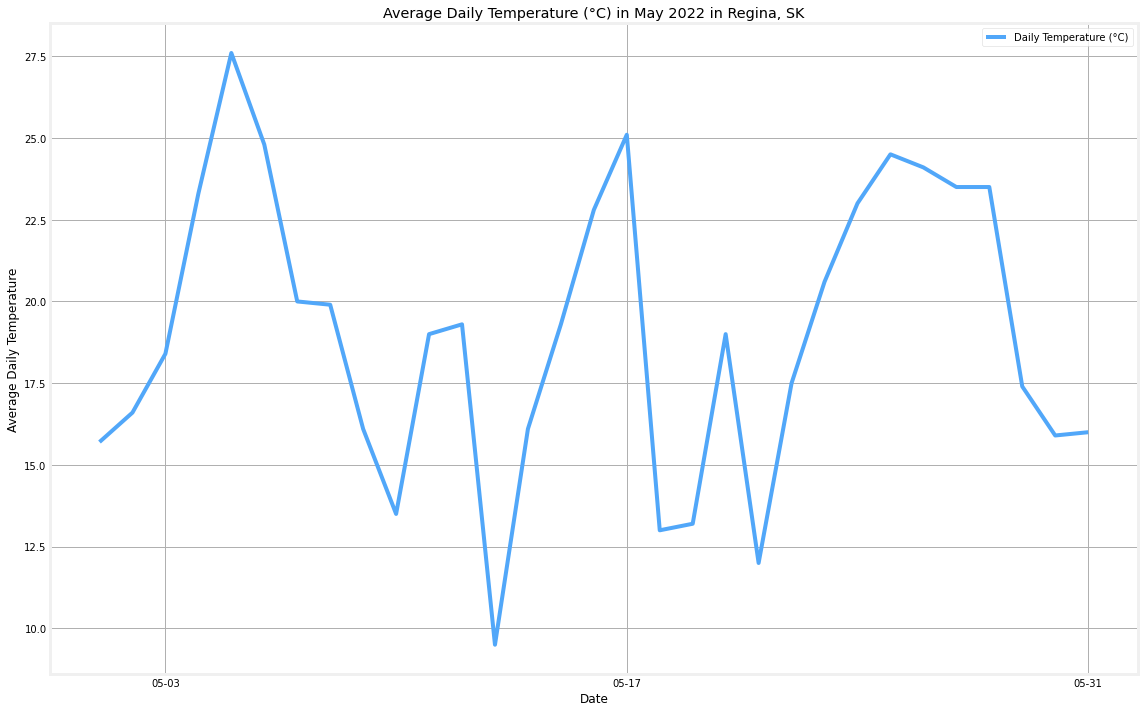

In [ ]:
# Plotting a graph of toy_df dataframe in which all the "NaN" values have been replaced with the mean (average)

# Setting size of the plot
fig, ax = plt.subplots(figsize=(16,10))

# Specifying which columns/variables are being plotted
ax.plot(toy_df['Date'], toy_df['Temperature'], label= 'Daily Temperature (°C)')

ax.set(xlabel="Date", ylabel="Average Daily Temperature",
       title="Average Daily Temperature (°C) in May 2022 in Regina, SK")

# Formatting the x-axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# show the legend in the output
plt.legend()

# show the plot in the output
plt.show()

Next I performed data imputation on **toy_df2** by replacing each NaN value with the previous element's value. 

For example, consider the two following elements: 13.5, "NaN", 19.3, ...
I would replace the "NaN" value with the previous element's value of 13.5. This means I would now have the following elements: 13.5, 13.5, 19.3, ...

**Run** the next code cell to load the provided **toy_df2** DataFrame.

In [ ]:
rng = pd.date_range('2022-05-01', periods=31, freq='D')

toy_df2 = pd.DataFrame({ 'Date': rng, 
                       'Temperature': [15.7, 16.6, 18.4, 23.3, 27.6, 24.8, 20.0,
                                       19.9, 16.1, 13.5, "NaN", 19.3, 9.5, 16.1, 
                                       19.3, 22.8, 25.1, 13.0, 13.2, "NaN", 12.0, 
                                       17.5, 20.6, 23.0, 24.5, 24.1, 23.5, 23.5, 
                                       17.4, 15.9, 16.0]})

print(toy_df2)

         Date Temperature
0  2022-05-01        15.7
1  2022-05-02        16.6
2  2022-05-03        18.4
3  2022-05-04        23.3
4  2022-05-05        27.6
5  2022-05-06        24.8
6  2022-05-07        20.0
7  2022-05-08        19.9
8  2022-05-09        16.1
9  2022-05-10        13.5
10 2022-05-11         NaN
11 2022-05-12        19.3
12 2022-05-13         9.5
13 2022-05-14        16.1
14 2022-05-15        19.3
15 2022-05-16        22.8
16 2022-05-17        25.1
17 2022-05-18        13.0
18 2022-05-19        13.2
19 2022-05-20         NaN
20 2022-05-21        12.0
21 2022-05-22        17.5
22 2022-05-23        20.6
23 2022-05-24        23.0
24 2022-05-25        24.5
25 2022-05-26        24.1
26 2022-05-27        23.5
27 2022-05-28        23.5
28 2022-05-29        17.4
29 2022-05-30        15.9
30 2022-05-31        16.0


**10.** Write code here to replace each "NaN" value of **toy_df2** with its previous element's value. I am allowed to hard code this step by directly accessing each specific element of **toy_df2** and replacing its "NaN" value.

I have used the **at** method to access specific elements of a DataFrame. You can read more about it here (https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/)


In [ ]:
# Replacing each "NaN" value of toy_df2 with its previous element's value

toy_df2.at[10,'Temperature'] = toy_df2.at[9,'Temperature']
toy_df2.at[19,'Temperature'] = toy_df2.at[18,'Temperature']

**11.** Output (printed) the contents of **toy_df2** (it should not have any "NaN" values in it).

In [ ]:
# Printing the contents of toy_df2 which does not have any "NaN" values

print(toy_df2)

         Date Temperature
0  2022-05-01        15.7
1  2022-05-02        16.6
2  2022-05-03        18.4
3  2022-05-04        23.3
4  2022-05-05        27.6
5  2022-05-06        24.8
6  2022-05-07        20.0
7  2022-05-08        19.9
8  2022-05-09        16.1
9  2022-05-10        13.5
10 2022-05-11        13.5
11 2022-05-12        19.3
12 2022-05-13         9.5
13 2022-05-14        16.1
14 2022-05-15        19.3
15 2022-05-16        22.8
16 2022-05-17        25.1
17 2022-05-18        13.0
18 2022-05-19        13.2
19 2022-05-20        13.2
20 2022-05-21        12.0
21 2022-05-22        17.5
22 2022-05-23        20.6
23 2022-05-24        23.0
24 2022-05-25        24.5
25 2022-05-26        24.1
26 2022-05-27        23.5
27 2022-05-28        23.5
28 2022-05-29        17.4
29 2022-05-30        15.9
30 2022-05-31        16.0


**12.** Plot a graph of the **toy_df** and **toy_df2** DataFrames now that each one no longer has "NaN" values.

The graph should include a legend (meaning each line should be different colours), a meaningful title, a labelled X-axis, and a labelled Y-axis.

Consider referring to this resource: https://www.geeksforgeeks.org/plot-multiple-lines-in-matplotlib/

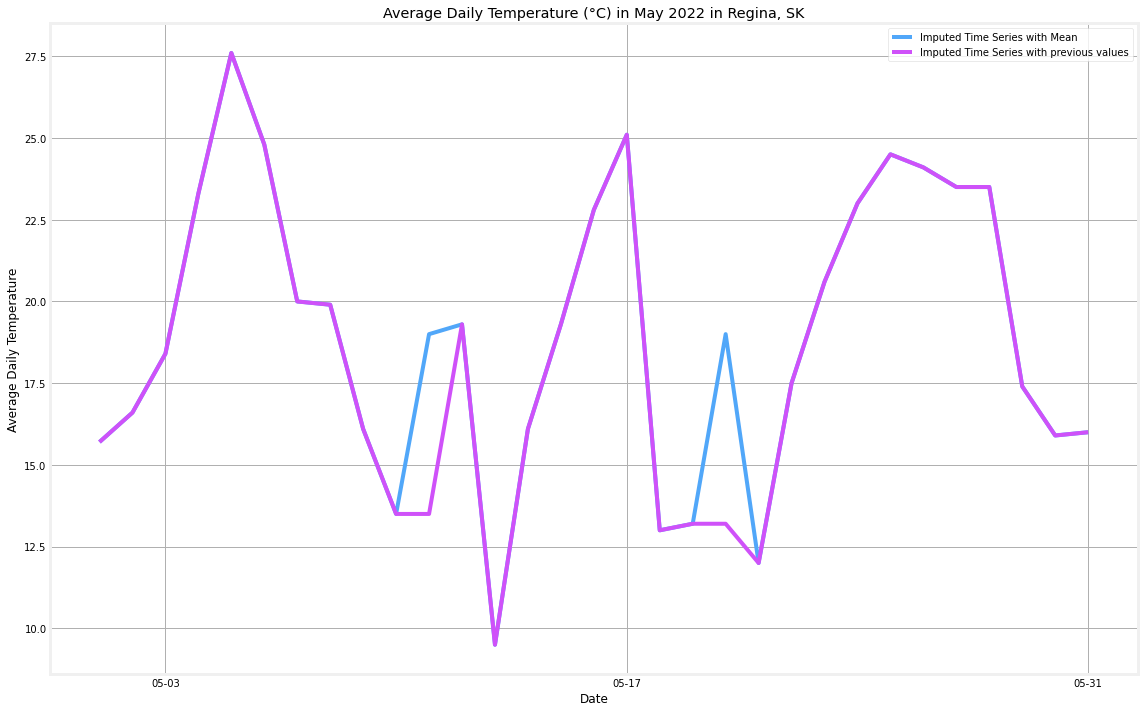

In [ ]:
# Setting the size of the plot
fig, ax = plt.subplots(figsize=(16,10))

# Specifying which variables are being plotted
ax.plot(toy_df['Date'], toy_df['Temperature'], label="Imputed Time Series with Mean")
ax.plot(toy_df2['Date'], toy_df2['Temperature'], label="Imputed Time Series with previous values")

ax.set(xlabel="Date", ylabel="Average Daily Temperature",
       title="Average Daily Temperature (°C) in May 2022 in Regina, SK")

# Formatting the x axis
# these two lines of code ensure that the dates do not overlap with each other
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# Indicating a legend is needed
plt.legend()

# Show the plot in the output
plt.show()

## **Part B - Persist and Exponential Smoothing Models**

In Part B, I have provided a toy data set of artificial (fake) data of daily temperatures in Regina for the week of June 5, 2022.

I want to demonstrate my understanding of the Persist and Exponential Smoothing models.

**Run** the next code cell to load the provided **toy_df3** DataFrame.

In [ ]:
rng = pd.date_range('2022-06-05', periods=7, freq='D')

toy_df3 = pd.DataFrame({ 'Date': rng, 
                       'Temperature': [18.8, 18.4, 19.3, 16.1, 19.3, 22.8, 20.2]})

print(toy_df3)

        Date  Temperature
0 2022-06-05         18.8
1 2022-06-06         18.4
2 2022-06-07         19.3
3 2022-06-08         16.1
4 2022-06-09         19.3
5 2022-06-10         22.8
6 2022-06-11         20.2


**13.** Recall the formula for the Persist model:

$\mathrm{x'}_{t} = {x}_{t-1}$

Quick Quiz: Please fill in the blank to answer what temperature the Persist model will predict for 2022-06-12 based on the **toy_df3** data.

**FILL IN THE BLANK:**

**Based on the data in toy_df3, the Persist model's predicted temperature for 2022-06-12 is: _________ (°C)**

**14.** The Persist model's predicted value will lag by 1 data point for all data points.

With this in mind, I created a DataFrame named **pm** that stores the predicted values for the daily temperature from 2022-06-06 to 2022-06-12 based on the data from **toy_df3**

In [ ]:
# Creating a dataframe pm and setting date as the index

pm = toy_df3
pm.set_index(["Date"], inplace = True)

In [ ]:
print(pm)

            Temperature
Date                   
2022-06-05         18.8
2022-06-06         18.4
2022-06-07         19.3
2022-06-08         16.1
2022-06-09         19.3
2022-06-10         22.8
2022-06-11         20.2


In [ ]:
# toy_df3 has the same date index
print(toy_df3)

            Temperature
Date                   
2022-06-05         18.8
2022-06-06         18.4
2022-06-07         19.3
2022-06-08         16.1
2022-06-09         19.3
2022-06-10         22.8
2022-06-11         20.2


In [ ]:
# Storing the predicted values for the daily temperature from 2022-06-06 to 2022-06-12 in pm which will lag by 1 datapoint

pm = pm.tshift()

**15.** Output (printed) the contents of **pm**.

In [ ]:
# Printing the contents of pm from 2022-06-06 to 2022-06-12

print(pm)

            Temperature
Date                   
2022-06-06         18.8
2022-06-07         18.4
2022-06-08         19.3
2022-06-09         16.1
2022-06-10         19.3
2022-06-11         22.8
2022-06-12         20.2


In [ ]:
# Just having a look at the values of pm and toy_df3. They are exactly the same just lagged by one data point

print(toy_df3)

            Temperature
Date                   
2022-06-05         18.8
2022-06-06         18.4
2022-06-07         19.3
2022-06-08         16.1
2022-06-09         19.3
2022-06-10         22.8
2022-06-11         20.2


**16.** Plotted a graph of the **toy_df3** and **pm** DataFrames.

The graph should include a legend (meaning each line should be different colours), a meaningful title, a labelled X-axis, and a labelled Y-axis.

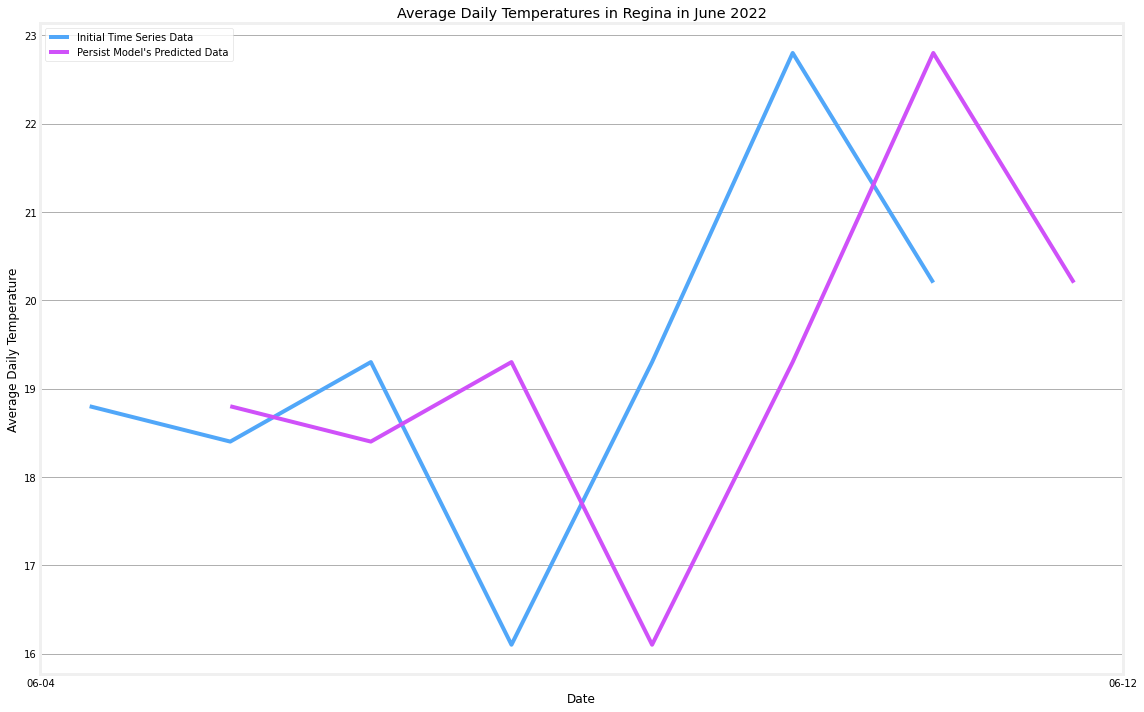

In [ ]:
# Plotting a graph of the toy_df3 and pm DataFrames
# Setting the size of the plot
fig, ax = plt.subplots(figsize=(16,10))

# Specifying the variables that are being plotted
ax.plot(toy_df3.index, toy_df3['Temperature'], label="Initial Time Series Data")
ax.plot(pm.index, pm['Temperature'], label="Persist Model's Predicted Data")

ax.set(xlabel="Date", ylabel="Average Daily Temperature",
       title="Average Daily Temperatures in Regina in June 2022")

# formatting the x axis
# these two lines of code ensure that the dates do not overlap with each other
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# Indicating that a legend is needed
plt.legend()

# Show the plot in the output
plt.show()

**17.** The formula for Exponetial Smoothing is:

$\mathrm{z}_{t} = \alpha {x}_{t} + (1 - \alpha){z}_{t-1}$

Assume that $\mathrm{z}_{0} = {x}_{0}$ and that $\mathrm\alpha = 0.50$

I have written a loop to compute the exponential smoothing values based on the data from **toy_df3**, storing each exponentialy smoothed value in the list named **es**. Each value must be rounded to one decimal place before being stored in the list.

In [ ]:
toy_df3.iloc[0].values[0]

18.8

In [ ]:
# Given alpha = 0.5
alpha = 0.50
es = []

# Loop to compute the exponential smoothing values based on data from toy_df3
def expSmoothing(data, prev_forecasted, alpha=0.5):
  # Rounding to one decimal place before being stored in the list
  return round(alpha*data + (1-alpha)*prev_forecasted,1)

es = [float(toy_df3.iloc[0].values[0])]
pf = es[0]
for i in range(1, len(toy_df3)):

  # val is the exponentially smoothed value
  val = expSmoothing(toy_df3.iloc[i].values[0], pf)

  # Storing each exponentialy smoothed value in the list named es
  es.append(val)
  pf = val

es = [round(i, 1) for i in es]
es

[18.8, 18.6, 19.0, 17.6, 18.5, 20.6, 20.4]

**18.** Output the contents of **es** (printed the list of exponentially smoothed values). Each value should be rouned to one decimal place.

In [ ]:
# Print the list of exponentially smoothed values, rouned to one decimal place
es = [round(i, 1) for i in es]
print(es)

[18.8, 18.6, 19.0, 17.6, 18.5, 20.6, 20.4]


## **Part C - ARIMA Preparation**

**19.** Loaded the **Weekly_Open_Gold_Prices_2017_2022.csv** data set into a series named **series**

In [ ]:
# Loading the Weekly_Open_Gold_Prices_2017_2022.csv data set into a series named series

series = pd.read_csv('Weekly_Open_Gold_Prices_2017_2022.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head)

<bound method NDFrame.head of Date
2017-01-02    1155.2
2017-01-09    1173.9
2017-01-16    1205.5
2017-01-23    1212.0
2017-01-30    1191.7
               ...  
2022-04-25    1925.0
2022-05-02    1896.7
2022-05-09    1866.6
2022-05-16    1790.5
2022-05-23    1846.3
Name: Open, Length: 282, dtype: float64>


**20.** Split 80% of the data set contained in **series** into a set called **train**. The remaining 20% will be contained in a set called **test**.

In [ ]:
# Splitting into 80% train and 20% test sets

# Making a copy of the series called X
X = series

# Specifying that 80% of the data is for training
size = int(len(X) * 0.80)

# 80% is for training,
# so the remainder, size:len(X), is for testing
train, test = X[0:size], X[size:len(X)]

**21.** Output (printed) the contents of **train**

**HINT:** Due to the large size of the series, it is okay if only a portion of the data is shown.

In [ ]:
# Printing the contents of train

print(train)

Date
2017-01-02    1155.2
2017-01-09    1173.9
2017-01-16    1205.5
2017-01-23    1212.0
2017-01-30    1191.7
               ...  
2021-03-22    1737.8
2021-03-29    1712.1
2021-04-05    1727.9
2021-04-12    1740.8
2021-04-19    1782.1
Name: Open, Length: 225, dtype: float64


In [ ]:
# Printing the contents of train

train.head()

Date
2017-01-02    1155.2
2017-01-09    1173.9
2017-01-16    1205.5
2017-01-23    1212.0
2017-01-30    1191.7
Name: Open, dtype: float64

**22.** Plotted a graph of **train**.

The graph should include a meaningful title, a labelled X-axis, and a labelled Y-axis.

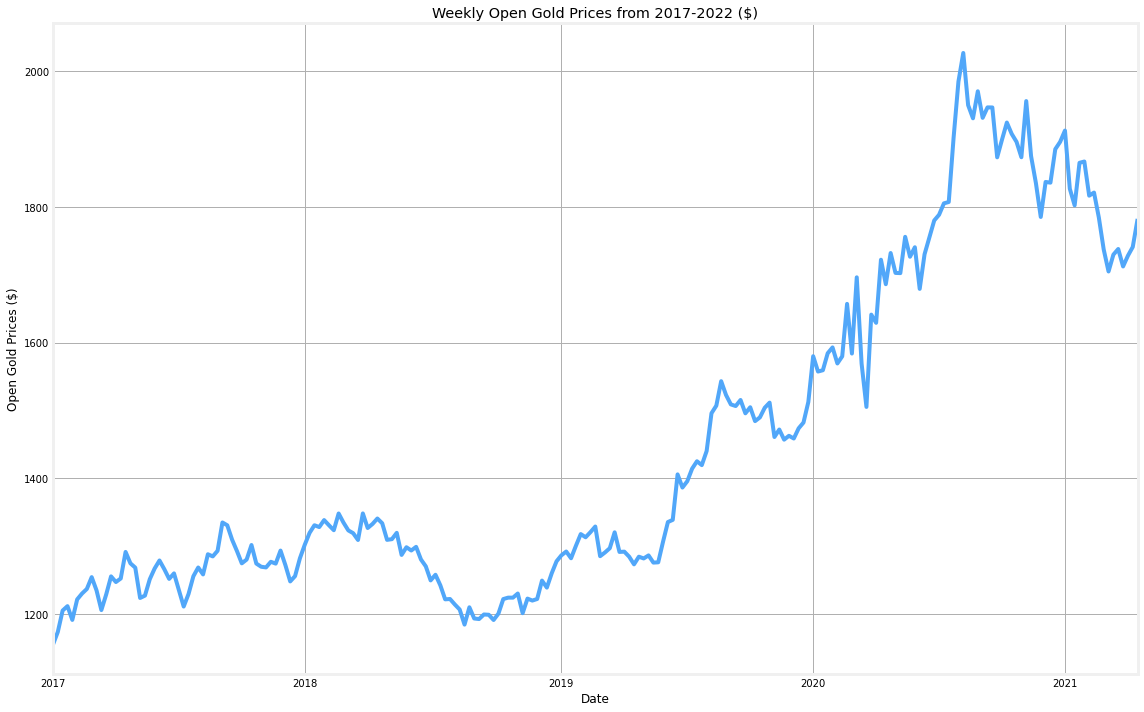

In [ ]:
# Plotting a graph of train

plt.rcParams["figure.figsize"] = (16, 10)

train.plot()
plt.title("Weekly Open Gold Prices from 2017-2022 ($)")
plt.xlabel("Date")
plt.ylabel("Open Gold Prices ($)")
plt.show()

**23.** Called the **plot_acf** method, sending **train** and **lags=105**.

**HINT:** Write a semi-colon (;) at the end of the call so that the graph only displays once instead of twice.


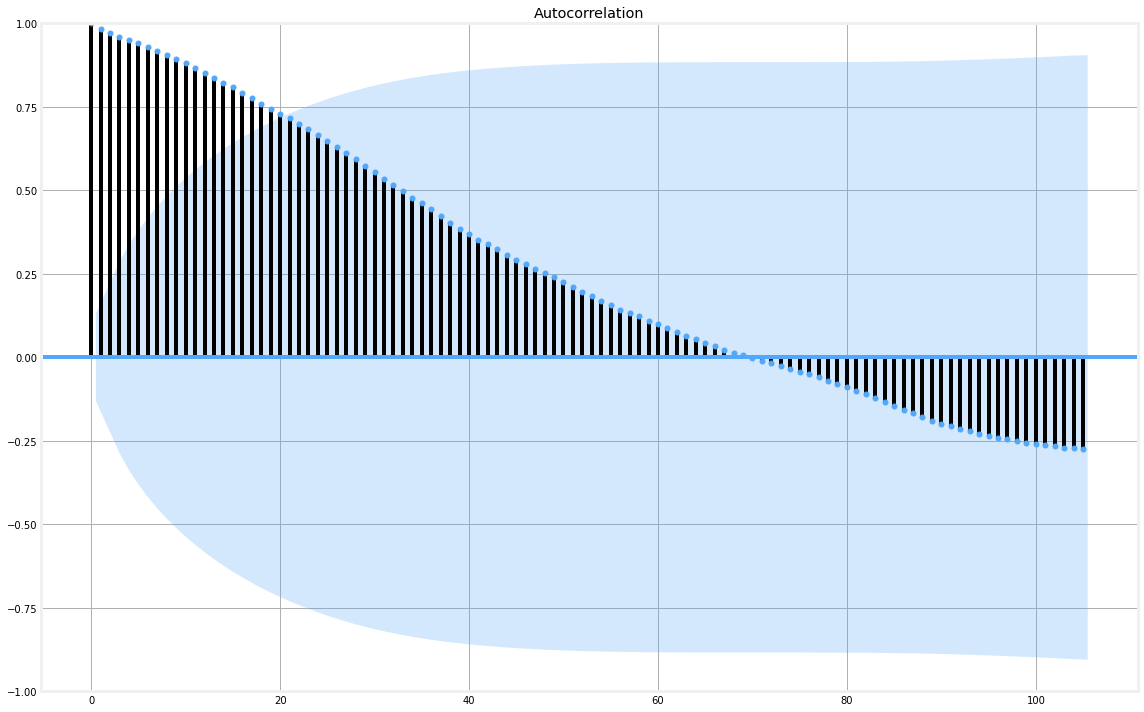

In [ ]:
# Calling the plot_acf method sending train and lags=105

plot_acf(train, lags=105);

The plot from this step will seem to suggest that the time series is not stationary.

Let's take the first difference of the original time series.

**24.** Created another series called **fd_series** that is the first difference of **train**.

**HINT:** Use **train** to call the **diff** method with a parameter of 1 followed by a call to **dropna** so that rows with "NaN" values are dropped.

In [ ]:
# Creating fd_series that is the first difference of train

fd_series = train.diff(1).dropna()

**25.** Ploted **train** and **fd_series** on a graph.

The graph should include a legend (meaning each line should be different colours), a meaningful title, a labelled X-axis, and a labelled Y-axis.

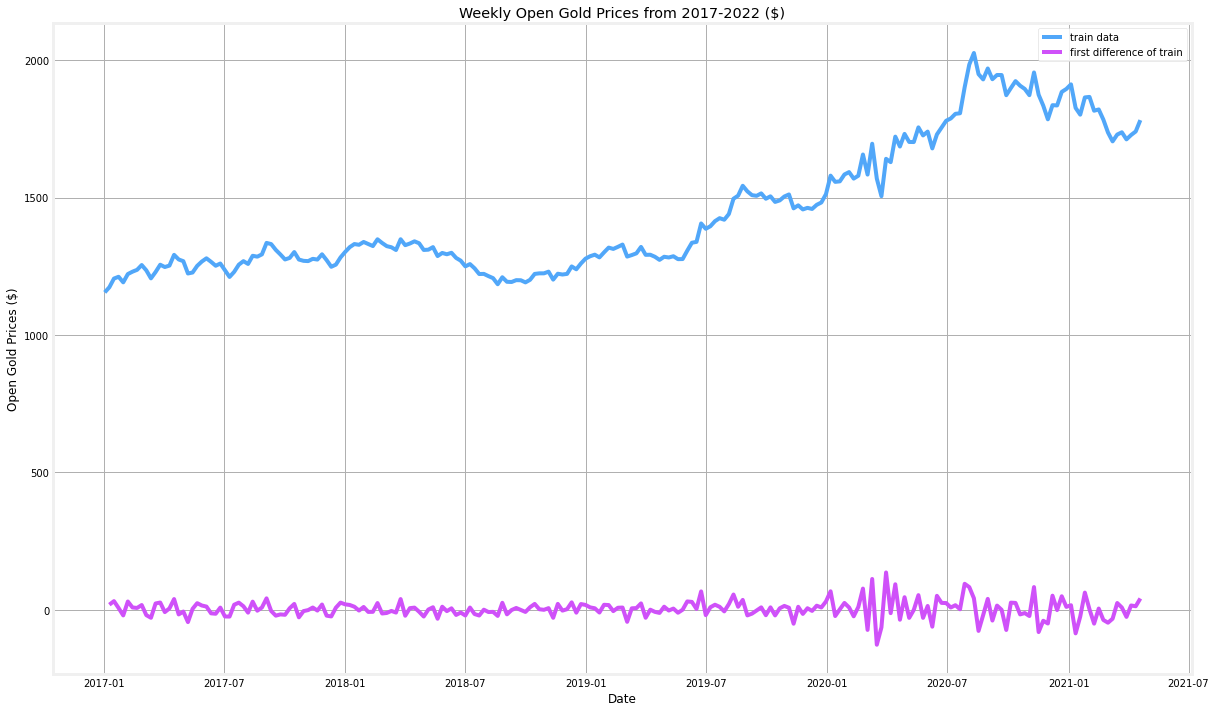

In [ ]:
# Plotting train and fd_series on a graph

# Setting the size of the plot
fig, ax = plt.subplots(figsize=(17,10))

# Specifying the variables that are being plotted
ax.plot(train.index, train.values, label="train data")
ax.plot(fd_series.index, fd_series.values, label="first difference of train")

ax.set(xlabel="Date", ylabel="Open Gold Prices ($)",
       title="Weekly Open Gold Prices from 2017-2022 ($)")

# Indicating that a legend is needed
plt.legend()

# Showing the plot in the output
plt.show()

You will notice that **fd_series** has several negative values due to the differencing.

**26.** In a later step, we will use an ARIMA model with the parameters $\mathrm{p} = 1$ and $\mathrm{q} = 1$.

First, we will verify why we want to use $\mathrm{p} = 1$.

So I called the **plot_acf** method, sending **fd_series** and **lags=105**.

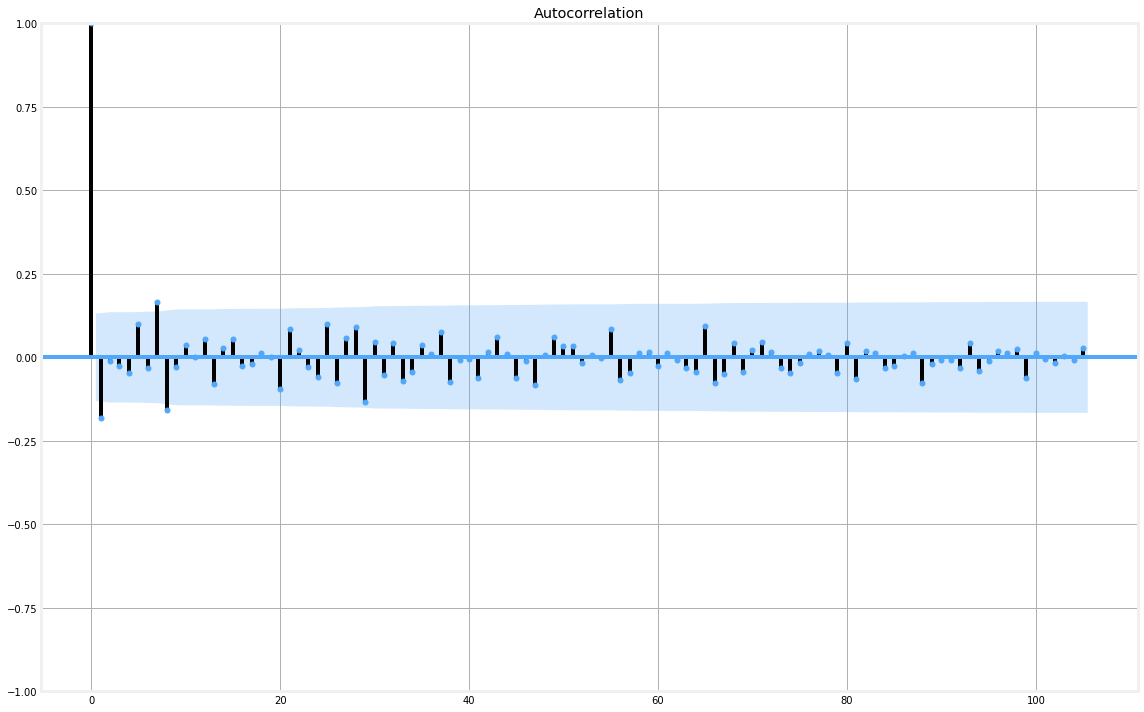

In [ ]:
# Calling the plot_acf method and sending fd_series and lags=105

plot_acf(fd_series, lags=105);

After plotting the autocorrelation function, we always skip the first lag and then we should see that there is one significant lag that follows.

Thus, we will be using $\mathrm{p} = 1$ in a later step.

**27.** Now we will verify why we want to use these $\mathrm{q} = 1$.

Called the **plot_pacf** method, sending **fd_series**.

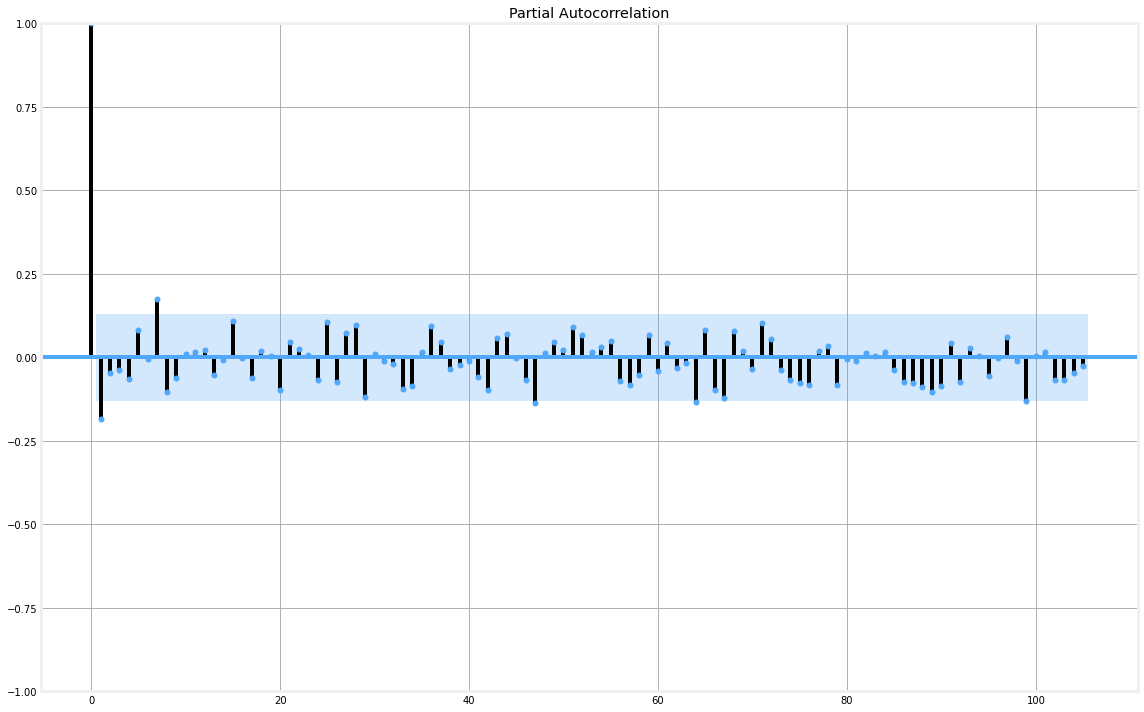

In [ ]:
# Calling the plot_pacf method and sending fd_series

plot_pacf(fd_series, lags=105);

Again, skip the very first lag and then we find that there is one significant lag that follows.

Thus, we will be using $\mathrm{q} = 1$ in a later step.

**28.** Created an ARIMA model using the **train** set and order($\mathrm1,1,1$). This means that $\mathrm{p} = 1$, $\mathrm{d} = 1$, and $\mathrm{q} = 1$.

Then fitted the model and output the summary by calling the **summary()** method.

In [ ]:
# Creating an ARIMA model using the train set and order (1,1,1)
model = ARIMA(train, order=(1, 1, 1))

# Fitting the model
model_fit = model.fit()

# Printing the summary by calling summary() method
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  225
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1091.130
Date:                Thu, 09 Jun 2022   AIC                           2188.260
Time:                        18:52:40   BIC                           2198.495
Sample:                    01-02-2017   HQIC                          2192.391
                         - 04-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0931      0.246      0.379      0.705      -0.389       0.575
ma.L1         -0.2763      0.235     -1.174      0.240      -0.738       0.185
sigma2       996.3829     65.615     15.185      0.000     867.779    1124.987
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                51.69
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               6.11   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Part D - Rolling Forecast ARIMA Model**

**29.** Performed a data type conversion on the **train** and **test** sets so that they are numpy.ndarrays. We needed to use the correct data type for the following steps.

In [ ]:
# Performing data type conversion on the train and test sets so that they are numpy.ndarrays
train = train.values
test = test.values

# Checking the data type of train dataset
type(train)

numpy.ndarray

In [ ]:
# Checking the data type of test dataset

type(test)

numpy.ndarray

In [ ]:
print(type(train),type(test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


As we can see above that the datatype of both train and test have become numpy.ndarrays

**30.** Created a numpy.ndarray called **history** that stores every value from **train**. Then create an empty list called **predictions**.

In [ ]:
# Creating a numpy.ndarray called history that stores every value from train
history = [x for x in train]

# Creating an empty list called predictions
predictions = list()

**31.** Performed walk-forward validation of an ARIMA model.

Please note that this process is computationally expensive (it will take almost a minute to complete). **Please ignore any ConvergenceWarnings that might appear in the output during this step.**

I have written a loop structure that iterates over every item in **test**. The loop must do the following:
1.   Create an ARIMA model using the **history** set and order($\mathrm1,1,1$)
2.   Create an object named **model_fit** that stores the fitted ARIMA model
3.   Create an object named **output** that stores **model_fit**'s forecast
4.   Create a variable named **pred** that stores the first element of **output**
5.   Append **pred** to **predictions**
6.   Create a variable named **obs** that stores the current item of the **test** set
7.   Append **obs** to **history**
8.   Output (print) **pred** and **obs** each rounded to two decimal places


In [ ]:
# a loop structure that iterates over every item in test
for t in range(len(test)):
	
	# 1. Creating an ARIMA model using the history set and order (1,1,1)
	model = ARIMA(history, order=(1,1,1))
 
	# 2. Creating an object named model_fit that stores the fitted ARIMA model
	model_fit = model.fit()

	# 3. Creating an object named output that stores model_fit's forecast
	output = model_fit.forecast()
 
	# 4. Creating a variable named pred that stores the first element of output	
	pred = output[0]

	# 5. Appending pred to predictions
	predictions.append(pred)
	
	# 6. Creating a variable named obs that stores the current item of the test set
	obs = test[t]

	# 7. Appending obs to history
	history.append(obs)
 
	# 8. Printing pred and obs each rounded to two decimal places
	print('predicted=%.2f, expected=%.2f' % (pred, obs))

predicted=1773.75, expected=1778.00
predicted=1776.46, expected=1788.50
predicted=1786.22, expected=1835.60
predicted=1826.62, expected=1849.90
predicted=1845.38, expected=1882.10
predicted=1875.86, expected=1905.10
predicted=1900.33, expected=1890.50
predicted=1892.12, expected=1866.20
predicted=1870.53, expected=1768.80
predicted=1784.66, expected=1779.60
predicted=1780.92, expected=1786.70
predicted=1785.98, expected=1802.60
predicted=1800.04, expected=1803.30
predicted=1802.59, expected=1802.50
predicted=1802.45, expected=1812.40
predicted=1810.88, expected=1753.50
predicted=1762.22, expected=1776.90
predicted=1775.26, expected=1776.80
predicted=1776.44, expected=1818.20
predicted=1811.60, expected=1825.70
predicted=1822.99, expected=1789.80
predicted=1794.53, expected=1751.80
predicted=1758.96, expected=1751.70
predicted=1754.08, expected=1764.50
predicted=1763.45, expected=1756.60
predicted=1757.41, expected=1761.60
predicted=1761.13, expected=1794.30
predicted=1789.26, expected=

**32.** Recall the formula for Root Mean Square Error (RMSE):

$\mathrm{RMSE} = \sqrt{ \frac{1}{N} \sum^{N}_{i=1}{(x_{i} - x'_{i})^2}}$

Compute and output (print) the Root Mean Square Error (RMSE) using the **test** and **predictions** sets.

Round to two decimal places.

In [ ]:
# Computing and printing the Root Mean Square Error (RMSE) using the test and predictions sets

rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)

# Rounding RMSE to two decimal places
print('Test RMSE: %.2f' % rmse)

34.142420440657666
Test RMSE: 34.14


**33.** Recall the formula for Normalized RMSE:

$\mathrm{Normalized RMSE} = \frac{RMSE}{(Maximum Value - Minimum Value)} $


Compute and output (print) the Normalized RMSE.

In this case, let Maximum Value be **test**.max() and the Minimum Value be **test**.min().

Round to two decimal places.


In [ ]:
# Computing and printing the Normalized RMSE
nrmse = rmse/(test.max()-test.min())
print(nrmse)

# Rounding Normalized RMSE to two decimal places
print('Test Normalized RMSE: %.2f' % nrmse)

0.14387872077816127
Test Normalized RMSE: 0.14


**34.** Plot **test** and **predictions** on a graph.

The graph should include a legend (meaning each line should be different colours), a meaningful title, a labelled X-axis, and a labelled Y-axis.


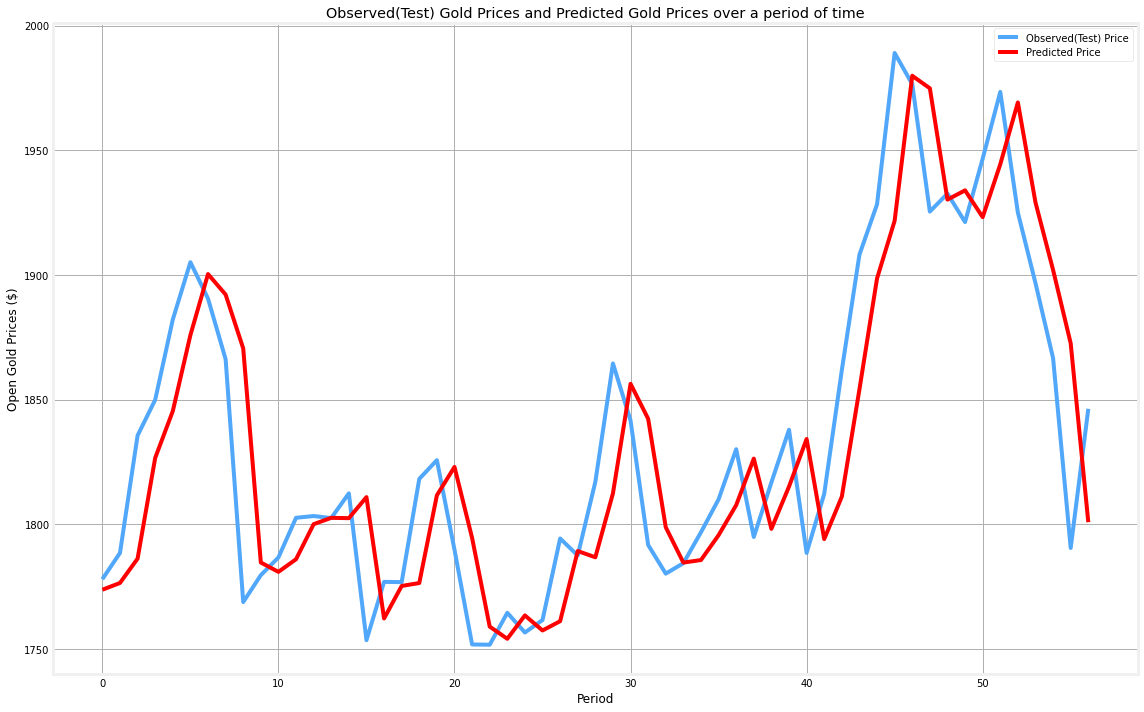

In [ ]:
# Plotting test and predictions on a graph

# Setting the size of the plot
fig, ax = plt.subplots(figsize=(16,10))

# Specifying the variables that are being plotted
ax.plot(test, label="Observed(Test) Price")
ax.plot(predictions, color='red', label="Predicted Price")

ax.set(xlabel="Period", ylabel="Open Gold Prices ($)",
       title="Observed(Test) Gold Prices and Predicted Gold Prices over a period of time")

# Indicating that a legend is needed
plt.legend()

# Showing the plot in the output
plt.show()

## **Part E - ARIMA Forecast**

In Part E, I created an ARIMA model with slightly different parameters from before and then plot a forecast.

**35.** Create an object named **model** that stores an ARIMA model. The ARIMA model will take the following parameters: the full data set called **series** and order($\mathrm2,1,2$). 

**NOTE:** This step is for fun, which is why we use the full data set and skip the analysis process of our ARIMA model with such parameters.

In [ ]:
# Creating an object named model that stores an ARIMA model. 
# The ARIMA model will take the following parameters: the full data set called series and order( 2,1,2 )

model = ARIMA(series, order=(2,1,2))

**36.** Create an object named **model_fit** that stores the fitted model.


In [ ]:
# Creating an object named model_fit that stores the fitted model

model_fit = model.fit()

**37.** Create an object named **forecast** that stores **model_fit**'s forecast for the next year (a year has 52 weeks). Thus, the **forecast()** method should be passed the parameter **steps=52**).


In [ ]:
# Creating an object named forecast that stores model_fit's forecast for the next year (a year has 52 weeks)

forecast = model_fit.forecast(steps=52)
print(forecast)

2022-05-30    1840.035743
2022-06-06    1841.328364
2022-06-13    1844.262580
2022-06-20    1838.444968
2022-06-27    1845.557556
2022-07-04    1838.655764
2022-07-11    1844.172627
2022-07-18    1840.741296
2022-07-25    1841.890776
2022-08-01    1842.779247
2022-08-08    1840.407890
2022-08-15    1843.554508
2022-08-22    1840.338365
2022-08-29    1843.044091
2022-09-05    1841.225409
2022-09-12    1842.010289
2022-09-19    1842.195219
2022-09-26    1841.262733
2022-10-03    1842.632352
2022-10-10    1841.152282
2022-10-17    1842.460569
2022-10-24    1841.520847
2022-10-31    1841.998613
2022-11-07    1841.976578
2022-11-14    1841.628140
2022-11-21    1842.213232
2022-11-28    1841.540806
2022-12-05    1842.165074
2022-12-12    1841.689474
2022-12-19    1841.961734
2022-12-26    1841.900985
2023-01-02    1841.780895
2023-01-09    1842.025306
2023-01-16    1841.723930
2023-01-23    1842.018058
2023-01-30    1841.781554
2023-02-06    1841.930058
2023-02-13    1841.878493
2023-02-20  

**NOTE:** You might want to try printing out **forecast** and checking to see if it has a date for each prediction.

For example, your forecast should look something like this (your predicted values will most likely be different):

2022-05-30    1840.035743

2022-06-06    1841.328364

2022-06-13    1844.262580

If you do not see dates listed in the first column, you may need to create another object with the dates the correspond to the predictions as shown in the tutorial for this assignment. The dates for the predictions are important for completing the next step.

**38.** Plot **series** and **forecast** on a graph.

The graph should include a legend (meaning each line should be different colours), a meaningful title, a labelled X-axis, and a labelled Y-axis.

In [ ]:
new_weeks = series.index[-1]+pd.timedelta_range('7 day', periods=52, freq='7d')

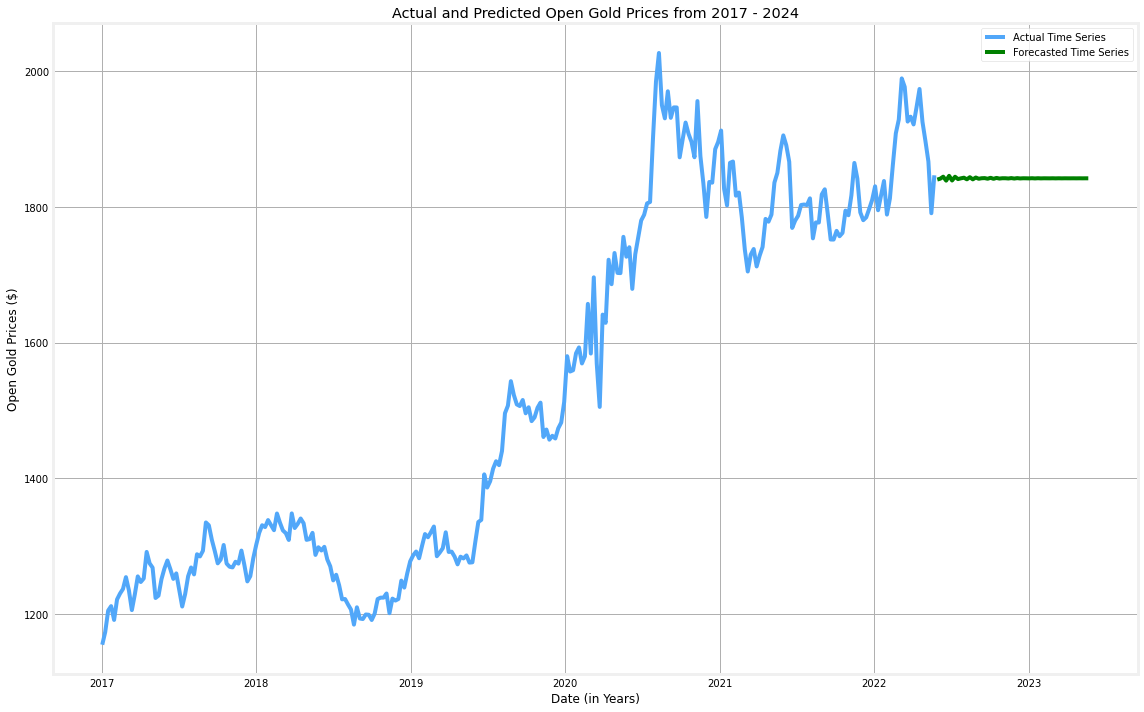

In [ ]:
# Plotting series and forecast on a graph

# Setting the size of the plot
fig, ax = plt.subplots(figsize=(16,10))

# Indicating which variables need to be plotted
plt.plot(series, label="Actual Time Series")
plt.plot(new_weeks, forecast, color='green', label="Forecasted Time Series")

# Including a meaningful title, a labelled X-axis, and a labelled Y-axis
ax.set(xlabel="Date (in Years)", ylabel="Open Gold Prices ($)",
       title="Actual and Predicted Open Gold Prices from 2017 - 2024")

# Indicating that a legend is needed
plt.legend()

# Showing the plot in the output
plt.show()

**NOTE:** You will notice that my forecast has a few slight movements in the first few steps before becoming a straight line that is essentially a trend. This is a common forecast for an ARIMA model.